Analyse socio-économique et délinquance, 2012-2016

In [14]:
import pandas as pd
#importation du dataset
data = pd.read_csv("full_dataset_normalized_2.csv", encoding='utf-8', sep=',')

C:\Users\thiba\AppData\Local\Temp\ipykernel_11276\2112852922.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("full_dataset_normalized_2.csv", encoding='utf-8', sep=',')


In [15]:
# On se concentre sur l'année 2012, et on exclue les valeurs France_Métro

data_2012 = data[data['annee']==2012]

data_2012 = data_2012[~(data_2012['code_dep'] == 'France_Métro')]

# Problème avec l'espace marquant le millier pour la colonne effectifs de police, mal converti par pandas d'où la nécessité de cet ajustement :
data_2012['effectif_total_police_national'] = data_2012['effectif_total_police_national'].replace('\xa0', '').astype(int)

#data_2012['effectif_total_police_national'].iloc[60]

# code_dep et Date sont en Object, on les convertit pour bien avoir le même type pour chaque colonne : str pour code_dep, date type pour Date

data_2012['code_dep'] = data_2012['code_dep'].astype(str)
data_2012['Date'] = pd.to_datetime(data_2012['Date'])

In [16]:
data_2012.columns

Index(['Date', 'code_dep', 'Homicides', 'Vols',
       'Cambriolages à domicile ou violaiton de domicile',
       'Crimes ou délits sexuelles', 'Infractions liées aux stupéfiants',
       'Dégradations ou destructions de biens volontaires', 'Violences',
       'Falsifications et contrefaçons', 'Délits Économiques et Financiers',
       'Irégularités de Main-d'oeuvre', 'annee', 'Population', 'Chomage',
       'Taux de pauvreté-moins de 30', 'Taux de pauvreté-30 à 39 ans',
       'Taux de pauvreté-40 à 49 ans', 'Taux de pauvreté-50 à 59 ans',
       'Taux de pauvreté-60 à 74 ans', 'Taux de pauvreté-75 ans ou plus',
       'Median_salaire', 'Taux de pauvreté-Ensemble', 'Bac_g_réussite_%',
       'Bac_t_réussite_%', 'Bac_p_réussite_%', 'Bac_g_%', 'Bac_t_%', 'Bac_p_%',
       'non_peu_diplômés_non_scolarisée_<15ans', 'Superficie\r\n(km2)',
       'effectif_total_police_national', 'Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domici

In [17]:
df1 = data_2012[['Date', 'code_dep', 'Vols_per_population', 'effectif_total_police_national_per_population']].copy()

In [18]:
#df1.head()

In [19]:
# Grouper par 'code_dep', puis calculer la moyenne annuelle pour les deux colonnes "vols_per_population" et effectifs policiers par population
df2 = df1.groupby('code_dep').mean().copy()

# Réinitialiser l'index si vous voulez que 'code_dep' redevienne une colonne
df2 = df2.reset_index()

df2.drop('Date', axis=1, inplace=True)

In [20]:
#test
#df2.loc[df2['code_dep'] == '17'] # nota : bien penser à mettre les guillemets car de type str

In [21]:
correlation = df2['Vols_per_population'].corr(df2['effectif_total_police_national_per_population'])

In [22]:
correlation

0.7373749231576757

In [23]:
# Corrélation entre effectifs de police et différents taux de délits/crimes ainsi que chômage, salaire médian, plusieurs catégories de pauvreté

categories = [ 'Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domicile_per_population',
       'Crimes ou délits sexuelles_per_population',
       'Infractions liées aux stupéfiants_per_population',
       'Dégradations ou destructions de biens volontaires_per_population',
       'Violences_per_population',
       'Falsifications et contrefaçons_per_population',
       'Délits Économiques et Financiers_per_population',
       "Irégularités de Main-d'oeuvre_per_population",
       'Chomage_per_population',
        'Taux de pauvreté-Ensemble',
        'Median_salaire',
        'Taux de pauvreté-moins de 30',
        'Taux de pauvreté-30 à 39 ans'
]

# Préparation du DataFrame pour le calcul de corrélation
df_correlation = pd.DataFrame(index=categories, columns=['Corrélation avec effectif_total_police_national_per_population'])

for categorie in categories:
    # Calculer la corrélation pour chaque catégorie
    df = data_2012[['Date', 'code_dep', categorie, 'effectif_total_police_national_per_population']].copy()
    df = df.groupby('code_dep').mean().copy()
    # Réinitialiser l'index si vous voulez que 'code_dep' redevienne une colonne
    df = df.reset_index() 
    df.drop('Date', axis=1, inplace=True)
    
    correlation = df[categorie].corr(df['effectif_total_police_national_per_population'])
    df_correlation.loc[categorie, 'Corrélation avec effectif_total_police_national_per_population'] = correlation

# Afficher les résultats
print(df_correlation)

                                                   Corrélation avec effectif_total_police_national_per_population
Homicides_per_population                                                                     0.343389            
Vols_per_population                                                                          0.737375            
Cambriolages à domicile ou violaiton de domicil...                                           0.351741            
Crimes ou délits sexuelles_per_population                                                    0.598007            
Infractions liées aux stupéfiants_per_population                                             0.588526            
Dégradations ou destructions de biens volontair...                                           0.534849            
Violences_per_population                                                                     0.507529            
Falsifications et contrefaçons_per_population                                           

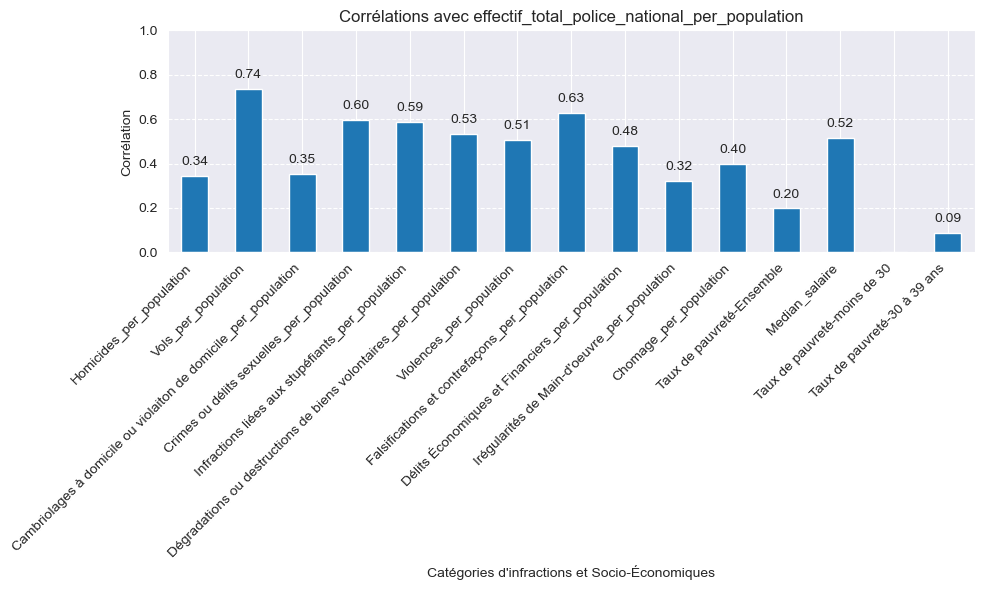

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Correction du nom de la colonne pour le tracé
y_lim = (0, 1)  # Assure que l'échelle des corrélations va de 0 à 1
fig, ax = plt.subplots(figsize=(10, 6))
df_correlation['Corrélation avec effectif_total_police_national_per_population'].plot.bar(ax=ax)
ax.set_title('Corrélations avec effectif_total_police_national_per_population')
ax.set_ylabel('Corrélation')
ax.set_xlabel("Catégories d'infractions et Socio-Économiques")
ax.set_ylim(y_lim)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', linestyle='--')

# Ajouter des étiquettes sur chaque barre
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


> On observe une forte corrélation entre le taux d'effectifs de police et le taux de vols, le taux d'infractions liées aux stupéfiants, le taux liées aux crimes ou délits sexuels, le taux de falsification et contrefaçons.

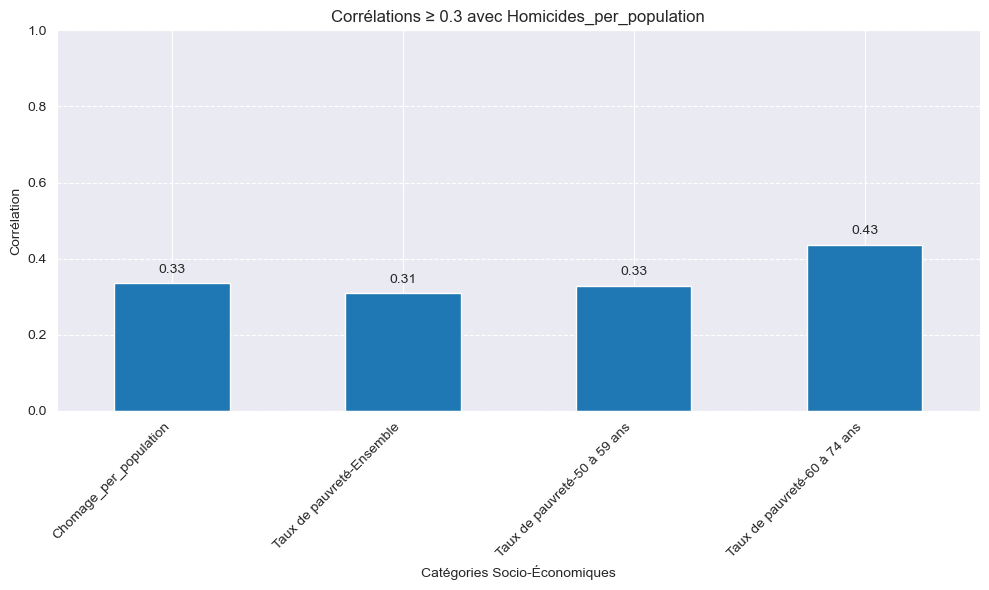

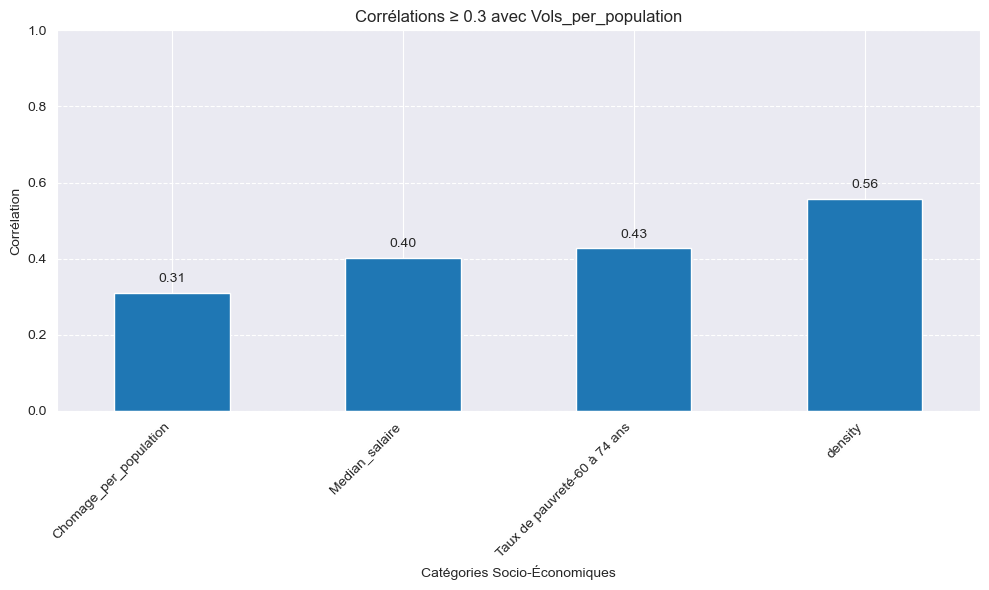

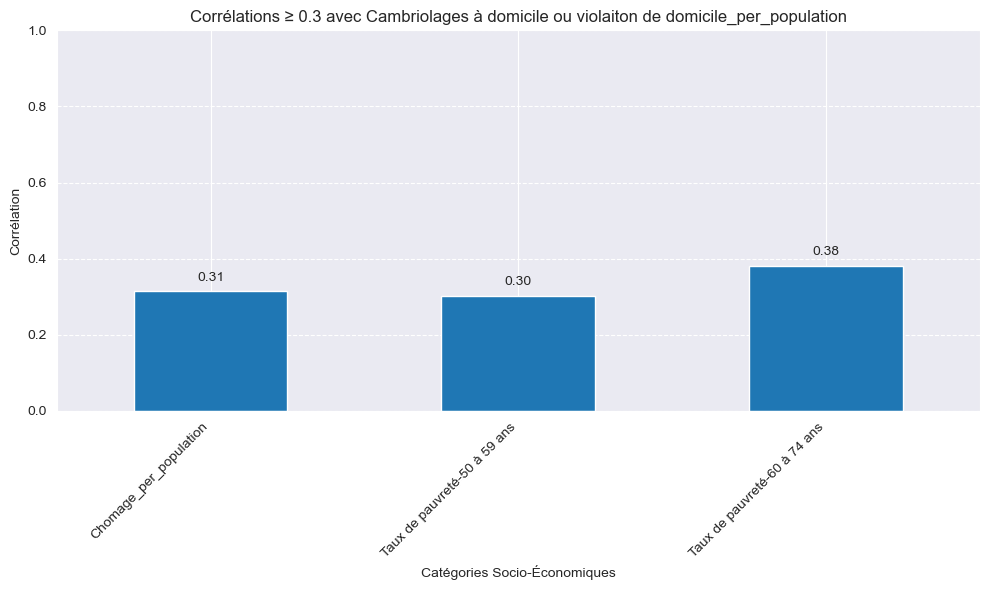

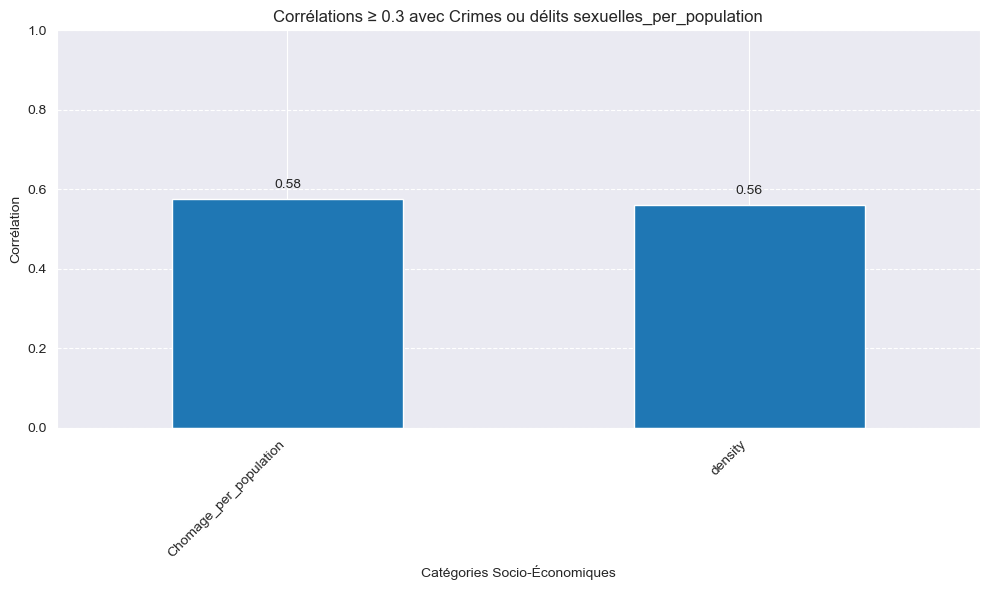

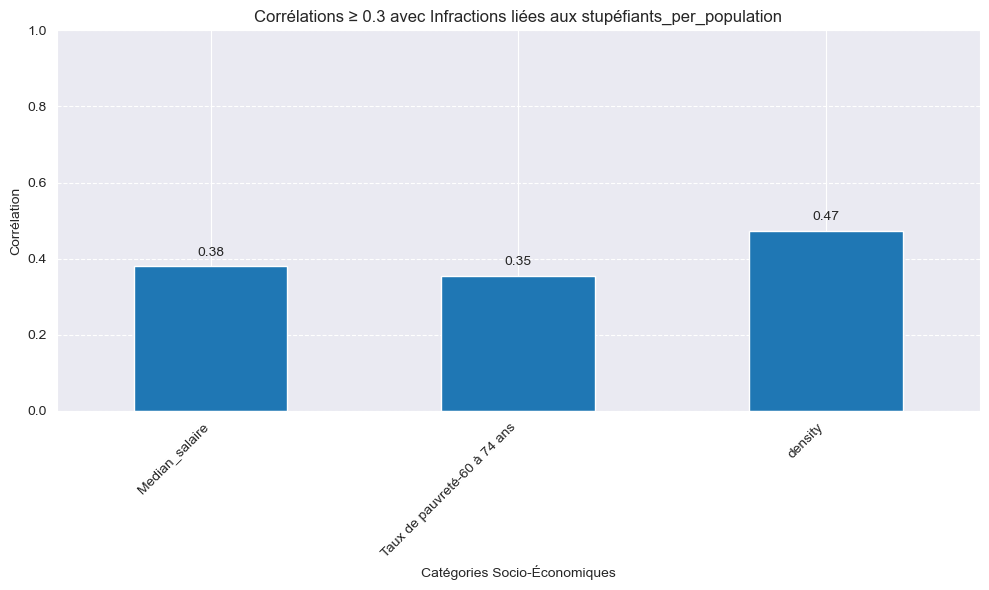

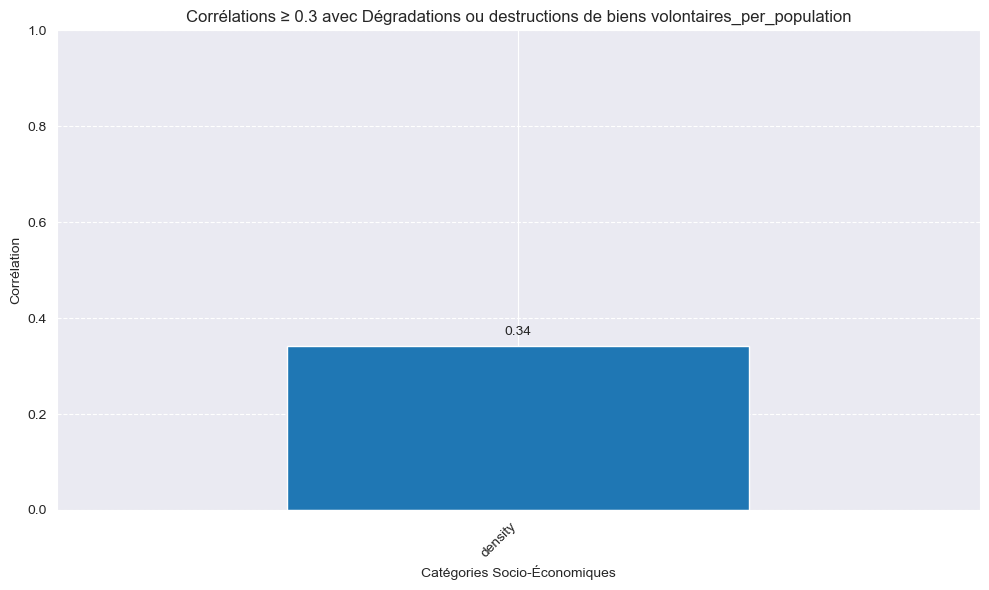

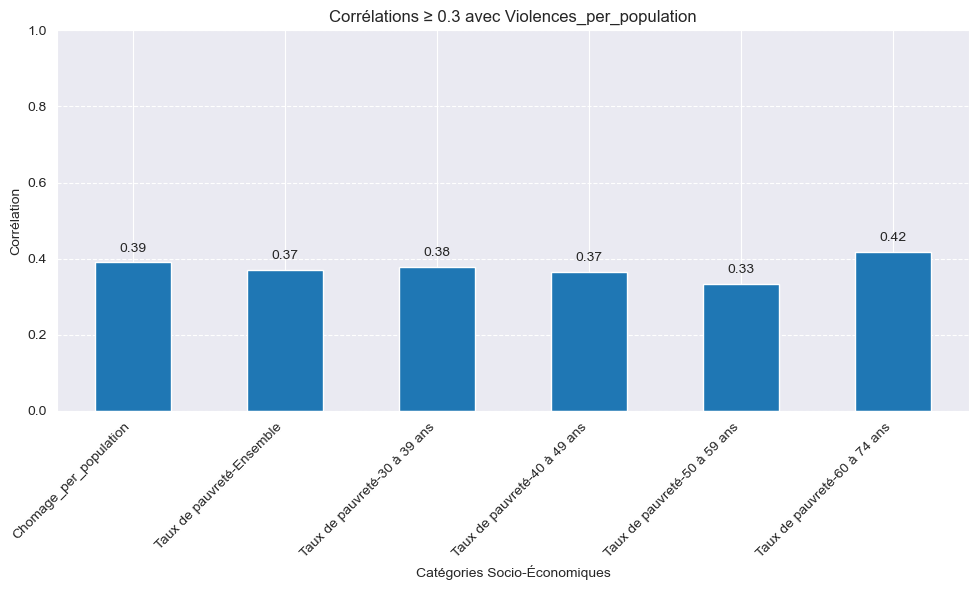

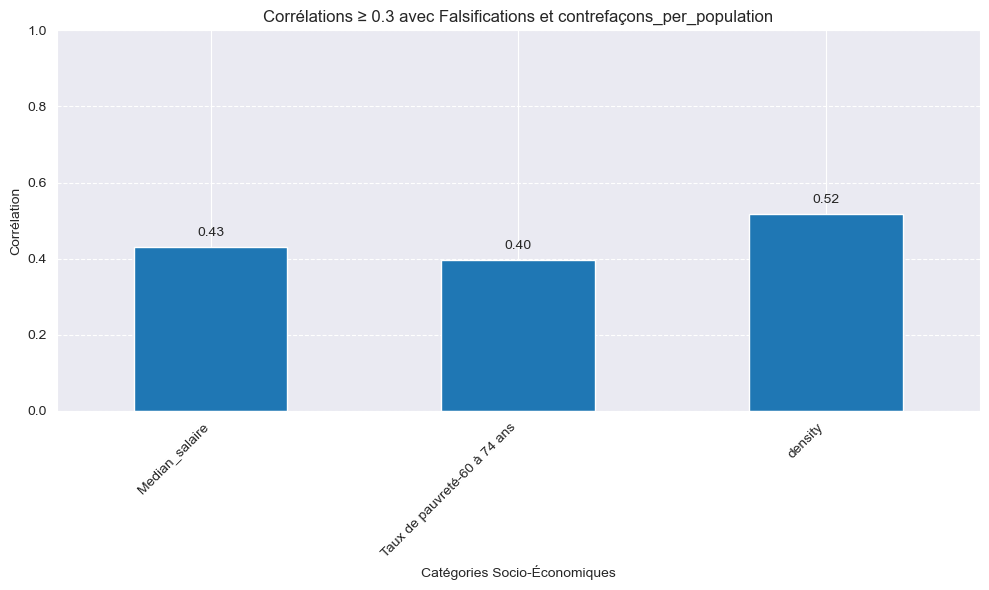

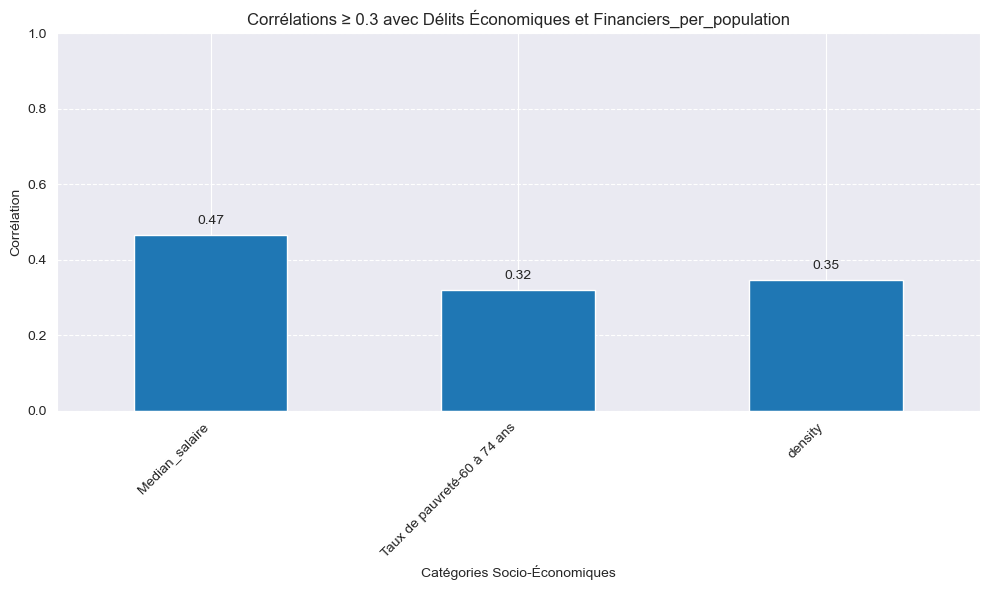

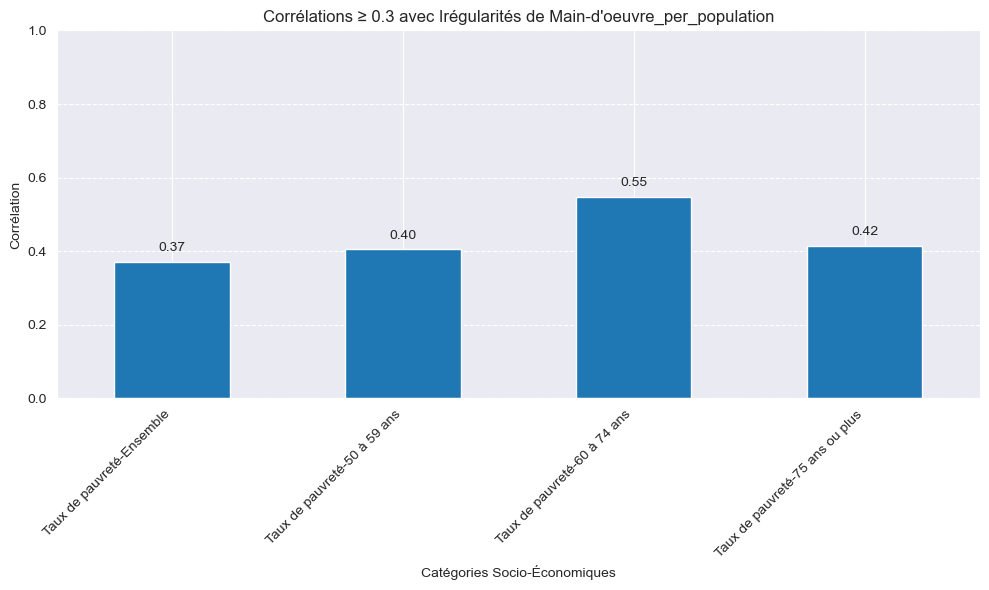

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

categories_infractions = ['Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domicile_per_population',
       'Crimes ou délits sexuelles_per_population',
       'Infractions liées aux stupéfiants_per_population',
       'Dégradations ou destructions de biens volontaires_per_population',
       'Violences_per_population',
       'Falsifications et contrefaçons_per_population',
       'Délits Économiques et Financiers_per_population',
       "Irégularités de Main-d'oeuvre_per_population"]


categories_socio_ecos = ['Chomage_per_population',
        'Taux de pauvreté-Ensemble',
        'Median_salaire',
        'Taux de pauvreté-moins de 30',
        'Taux de pauvreté-30 à 39 ans',
        'Taux de pauvreté-40 à 49 ans', 
        'Taux de pauvreté-50 à 59 ans',
        'Taux de pauvreté-60 à 74 ans',
        'Taux de pauvreté-75 ans ou plus',
         'density']

# Définir l'échelle commune pour tous les graphiques
y_lim = (0, 1)  # Assure que l'échelle des corrélations va de 0 à 1

for cat_infra in categories_infractions:
    correlations = []
    for categorie in categories_socio_ecos:
        # Calculer la corrélation pour chaque catégorie
        df = data_2012[['Date', 'code_dep', categorie, cat_infra]].copy()
        df = df.groupby('code_dep').mean().reset_index()
        df.drop('Date', axis=1, inplace=True)
        
        correlation = df[categorie].corr(df[cat_infra])
        if correlation >= 0.3:
            correlations.append((categorie, correlation))
    
    # S'il y a des corrélations significatives, afficher le graphique
    if correlations:
        df_correlation_significant = pd.DataFrame(correlations, columns=['Catégorie', 'Corrélation'])
        df_correlation_significant.set_index('Catégorie', inplace=True)
        
        # Tracé du graphique en barre
        fig, ax = plt.subplots(figsize=(10, 6))
        df_correlation_significant['Corrélation'].plot.bar(ax=ax)
        ax.set_title(f'Corrélations ≥ 0.3 avec {cat_infra}')
        ax.set_ylabel('Corrélation')
        ax.set_xlabel('Catégories Socio-Économiques')
        ax.set_ylim(y_lim)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.grid(axis='y', linestyle='--')

        # Ajouter des étiquettes sur chaque barre
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
        plt.tight_layout()
        plt.show()



> On observe en général une corrélation significative des catégories d'infractions avec le taux de pauvreté 60 à 74 ans, et dans une moindre mesure avec le taux de chômage et le taux de pauvreté global. Le salaire médian est corrélé aux catégories Délits Économiques et Financiers_per_population et Falsifications, contrefaçons_per_population et Infractions liées aux stupéfiants_per_population.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Faire heatmap corrélation entre les deux listes catégories + effectifs de police

#Calcul du taux de corrélation entre ces deux taux 
.corr(method="pearson")

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre dégradations et effectifs de police ')
plt.show()